In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#list_names = ['User1', 'User3','User4', 'User5', 'User6']#, 'User7']
list_names = ['User3', 'User3']#,'User4', 'User5', 'User6']#, 'User7']

#list_names = ['User1','User3', 'User4', 'User5', 'User6', 'User7']
nbUsers = len(list_names)

list_alpha = [0, 0.25, 0.5, 0.75, 1]#, 0.05, 0.1, 0.15, 0.2, 0.3]
nbAlpha = len(list_alpha)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

In [2]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [3]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [4]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [5]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(0, 38):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [6]:
analysisPerScale.head()

Beta  Gamma  Tolerance   User      large     medium      small
Tolerance                                                                
0          1.05    0.0          0  User3  16.597210  13.983175   8.568475
300        1.05    0.0        300  User3  27.464838  34.942840  33.849312
350        1.05    0.0        350  User3  28.611239  42.345676  39.243216
400        1.05    0.0        400  User3  30.292705  48.365358  42.328755
450        1.05    0.0        450  User3  32.674850  55.600611  44.910943

In [7]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [8]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [9]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0               69.678400   
1       1                  0.0               33.916653   
2       2                  0.0               22.725787   
3       3                  0.0               70.624906   
4       4                  0.0               32.733150   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0               77.392100               91.012700               93.147450   
1               33.141894               32.145782               32.896429   
2               22.974475               22.616800               22.800450   
3               77.590569               80.252619               81.957181   
4               33.420740               46.186830               64.005120   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0               93.094350               93.050700               92.328900   
1               32.896429               32.896429               38.568635   
2               22.800450               22.800450               22.800450   
3               83.418006               88.216306               94.277544   
4               71.978760               75.171320               76.281720   

   DistBoneInTolTime.1350  ...  DistanceInTolTime.700  DistanceInTolTime.750  \
0               91.992350  ...              34.444499              34.444499   
1               38.104300  ...             219.313151             221.508386   
2               22.800450  ...              29.125260              30.957373   
3               95.082644  ...             340.936971             343.050615   
4               77.431610  ...              27.448572              32.279892   

   DistanceInTolTime.800  DistanceInTolTime.850  DistanceInTolTime.900  \
0             116.163799             116.163799             116.163799   
1             327.655328             329.331022             329.331022   
2              31.383660              32.278110              32.427235   
3             346.539496             352.465471             387.492415   
4              41.773402              47.023542              49.748772   

   DistanceInTolTime.950   Obj  Scale       Task   User  
0             116.163799  obj0  small      Touch  User3  
1             329.331022  obj0  small      Raise  User3  
2              32.427235  obj0  small       Pull  User3  
3             388.567665  obj0  small       Push  User3  
4              49.955242  obj0  small  Push Down  User3  

[5 rows x 77 columns]

In [10]:
meanPerScale.tail()

Beta  Gamma      large     medium      small
450  1.05    0.0  32.674850  55.600611  44.910943
400  1.05    0.0  30.292705  48.365358  42.328755
350  1.05    0.0  28.611239  42.345676  39.243216
300  1.05    0.0  27.464838  34.942840  33.849312
0    1.05    0.0  16.597210  13.983175   8.568475

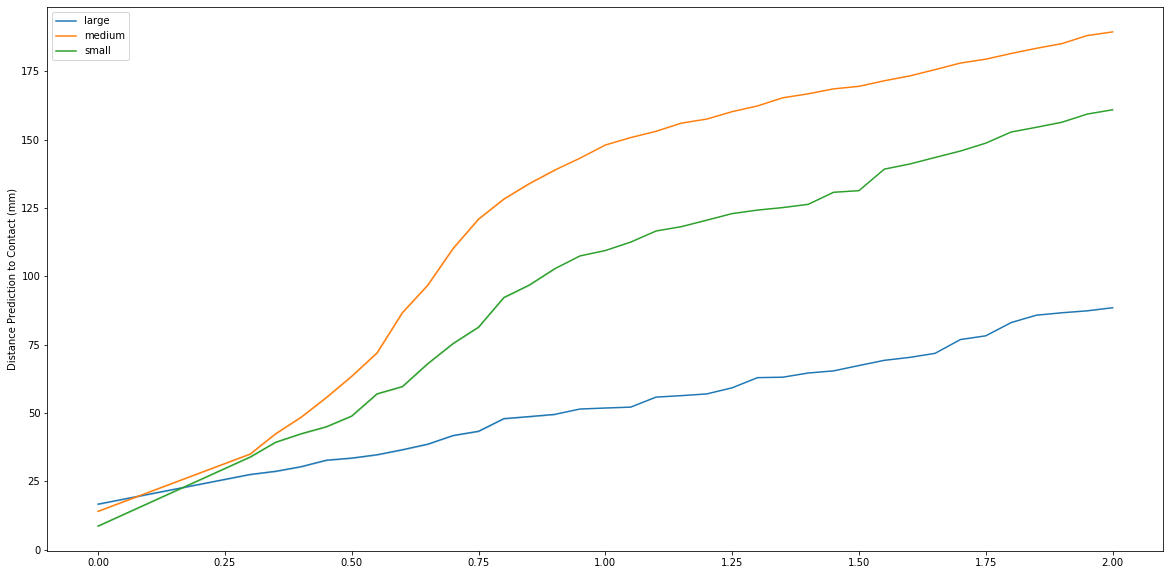

In [11]:
plt.figure(figsize = (20,10))
cond = (meanPerScale['Beta'] == 1.05) & (meanPerScale['Gamma'] == 0)
toleranceplt = meanPerScale.index/1000
sns.lineplot(x = toleranceplt , y = 'large', data = meanPerScale, label = 'large')
sns.lineplot(x = toleranceplt, y = 'medium', data = meanPerScale, label = 'medium')#[cond])
sns.lineplot(x = toleranceplt, y = 'small', data = meanPerScale, label = 'small')#[cond])
plt.ylabel('Distance Prediction to Contact (mm)')
plt.xlabel = ('Time')
plt.legend()

In [12]:
globalAnalysis

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  \
Tolerance                                                           
0          1.05    0.000000    0.000000     0.000000     0.000000   
300        1.05   22.475863   21.323150    22.192995    22.460936   
350        1.05   25.288913   24.079569    26.934922    25.713252   
400        1.05   28.393406   27.184063    29.563833    30.418146   
450        1.05   30.324319   30.315394    33.503259    33.285254   
500        1.05   35.529143   35.520218    37.410252    39.283565   
550        1.05   36.145856   37.874118    40.831871    42.405358   
600        1.05   31.809519   33.537781    42.927669    45.949262   
650        1.05   35.367181   37.560638    47.307176    50.439523   
700        1.05   39.987175   41.670031    49.745883    54.825905   
750        1.05   63.996263   65.679119    50.578102    56.287684   
800        1.05   67.475056   70.358588    50.548379    59.569326   
850        1.05   79.091669   81.975200    52.171672    64.774865   
900        1.05   85.415925   87.219875    56.378712    72.427585   
950        1.05   94.289613   96.705313    64.240631    76.750809   
1000       1.05  107.428363  108.894269    65.605672    82.607468   
1050       1.05  112.832156  116.428413    65.999538    85.171966   
1100       1.05  118.805913  123.229400    67.561222    90.996541   
1150       1.05  126.877875  128.559263    70.007641    91.545000   
1200       1.05  129.256644  130.746900    72.979772    95.969340   
1250       1.05  131.693969  133.184225    70.253538    97.714326   
1300       1.05  134.220325  135.074481    74.471917   100.180567   
1350       1.05  134.735325  136.691938    77.310802   102.743513   
1400       1.05  135.599831  137.556444    78.508457   105.202134   
1450       1.05  136.970294  137.824450    82.366822   107.787484   
1500       1.05  138.664750  139.518906    87.894959   109.267135   
1550       1.05  139.871969  140.495763    92.736459   112.233962   
1600       1.05  140.091625  140.715419    96.955005   115.254060   
1650       1.05  142.465069  144.002538   101.340093   116.724321   
1700       1.05  144.569400  146.092900   107.379472   121.567098   
...         ...         ...         ...          ...          ...   
550        1.05   36.145856   37.874118    40.831871    42.405358   
600        1.05   31.809519   33.537781    42.927669    45.949262   
650        1.05   35.367181   37.560638    47.307176    50.439523   
700        1.05   39.987175   41.670031    49.745883    54.825905   
750        1.05   63.996263   65.679119    50.578102    56.287684   
800        1.05   67.475056   70.358588    50.548379    59.569326   
850        1.05   79.091669   81.975200    52.171672    64.774865   
900        1.05   85.415925   87.219875    56.378712    72.427585   
950        1.05   94.289613   96.705313    64.240631    76.750809   
1000       1.05  107.428363  108.894269    65.605672    82.607468   
1050       1.05  112.832156  116.428413    65.999538    85.171966   
1100       1.05  118.805913  123.229400    67.561222    90.996541   
1150       1.05  126.877875  128.559263    70.007641    91.545000   
1200       1.05  129.256644  130.746900    72.979772    95.969340   
1250       1.05  131.693969  133.184225    70.253538    97.714326   
1300       1.05  134.220325  135.074481    74.471917   100.180567   
1350       1.05  134.735325  136.691938    77.310802   102.743513   
1400       1.05  135.599831  137.556444    78.508457   105.202134   
1450       1.05  136.970294  137.824450    82.366822   107.787484   
1500       1.05  138.664750  139.518906    87.894959   109.267135   
1550       1.05  139.871969  140.495763    92.736459   112.233962   
1600       1.05  140.091625  140.715419    96.955005   115.254060   
1650       1.05  142.465069  144.002538   101.340093   116.724321   
1700       1.05  144.569400  146.092900   107.379472   121.567098   
1750       1.05  150.579494  151.548206   107.930455   127.024246   
1800     

In [13]:
analysisPerTask.head()

Beta  Gamma       Pull       Push  Push Down      Raise  Tolerance  \
Tolerance                                                                       
0          1.05    0.0   4.803213  16.121368  24.624853  11.340957          0   
300        1.05    0.0  28.820961  30.489550  34.140175  46.789702        300   
350        1.05    0.0  34.726558  34.879852  35.839409  55.545571        350   
400        1.05    0.0  37.592856  37.244766  40.644542  58.619444        400   
450        1.05    0.0  44.567129  39.800463  41.920475  63.954628        450   

               Touch   User  
Tolerance                    
0           8.357710  User3  
300        20.187929  User3  
350        22.675494  User3  
400        27.543090  User3  
450        31.734645  User3

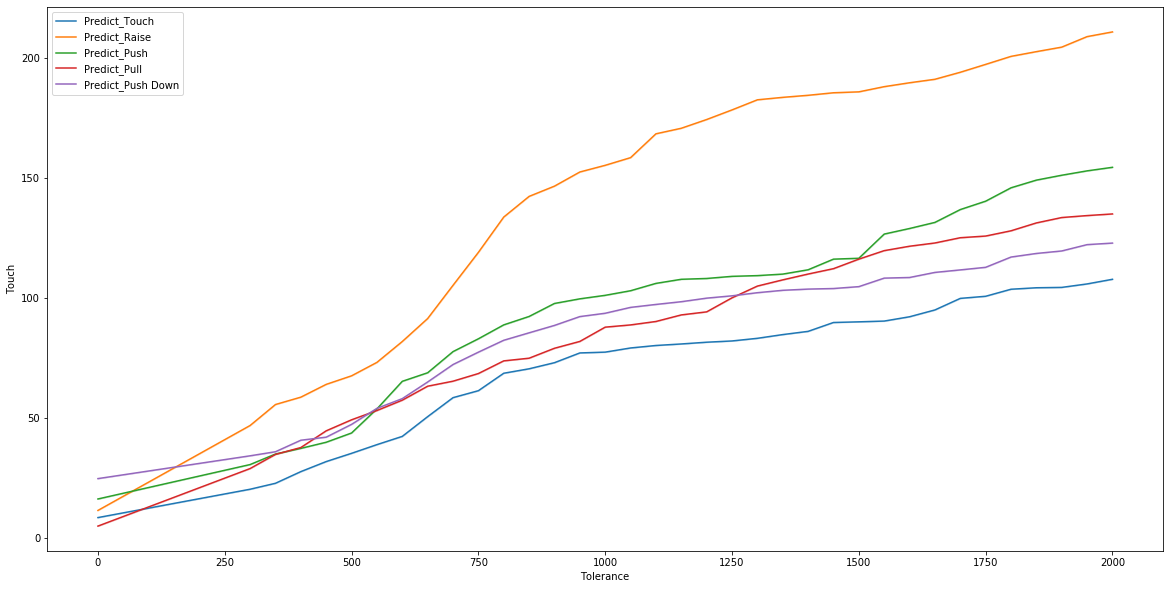

In [14]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

#plt.figure(figsize=(20,10))
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')


In [15]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0               69.678400   
1       1                  0.0               33.916653   
2       2                  0.0               22.725787   
3       3                  0.0               70.624906   
4       4                  0.0               32.733150   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0               77.392100               91.012700               93.147450   
1               33.141894               32.145782               32.896429   
2               22.974475               22.616800               22.800450   
3               77.590569               80.252619               81.957181   
4               33.420740               46.186830               64.005120   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0               93.094350               93.050700               92.328900   
1               32.896429               32.896429               38.568635   
2               22.800450               22.800450               22.800450   
3               83.418006               88.216306               94.277544   
4               71.978760               75.171320               76.281720   

   DistBoneInTolTime.1350  ...  DistanceInTolTime.700  DistanceInTolTime.750  \
0               91.992350  ...              34.444499              34.444499   
1               38.104300  ...             219.313151             221.508386   
2               22.800450  ...              29.125260              30.957373   
3               95.082644  ...             340.936971             343.050615   
4               77.431610  ...              27.448572              32.279892   

   DistanceInTolTime.800  DistanceInTolTime.850  DistanceInTolTime.900  \
0             116.163799             116.163799             116.163799   
1             327.655328             329.331022             329.331022   
2              31.383660              32.278110              32.427235   
3             346.539496             352.465471             387.492415   
4              41.773402              47.023542              49.748772   

   DistanceInTolTime.950   Obj  Scale       Task   User  
0             116.163799  obj0  small      Touch  User3  
1             329.331022  obj0  small      Raise  User3  
2              32.427235  obj0  small       Pull  User3  
3             388.567665  obj0  small       Push  User3  
4              49.955242  obj0  small  Push Down  User3  

[5 rows x 77 columns]

In [16]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']

for tol in range(300, 2050, 50):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    

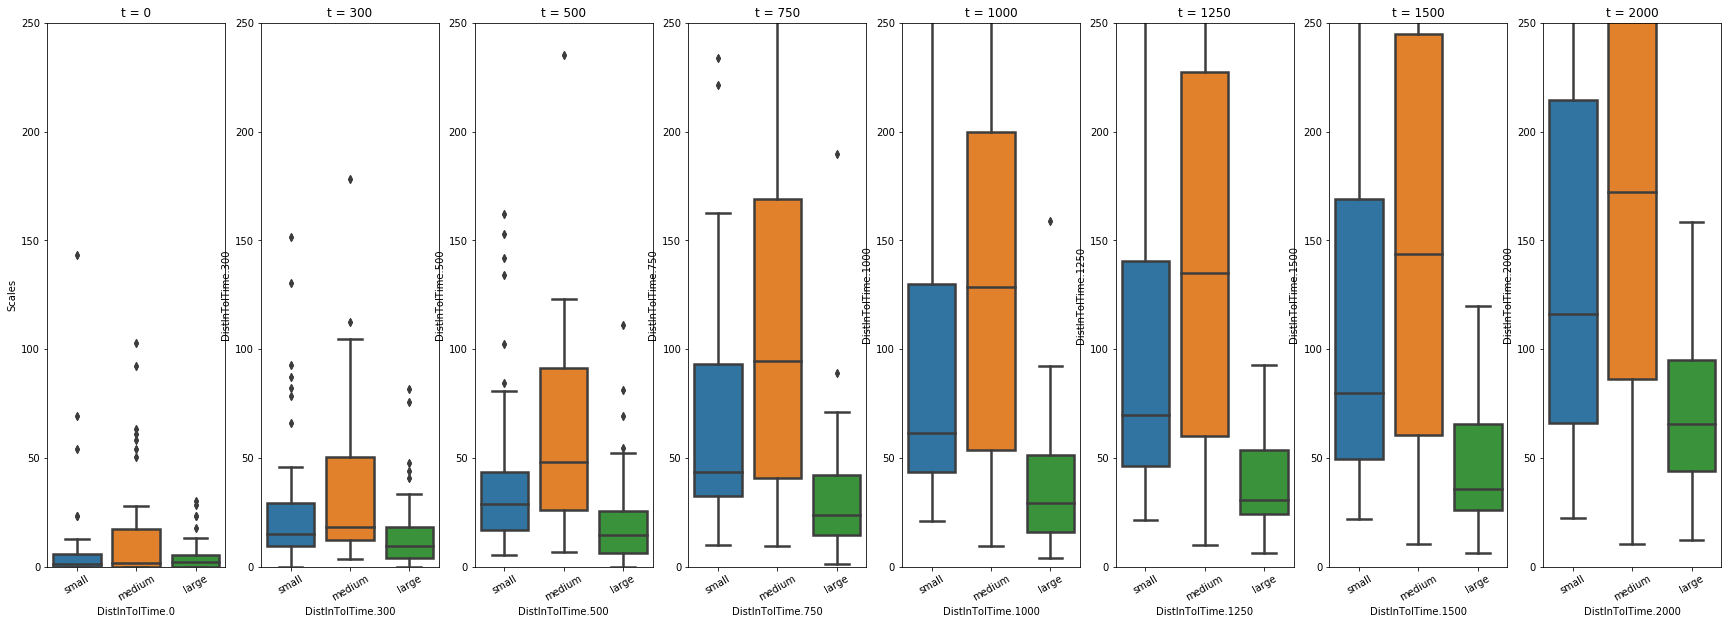

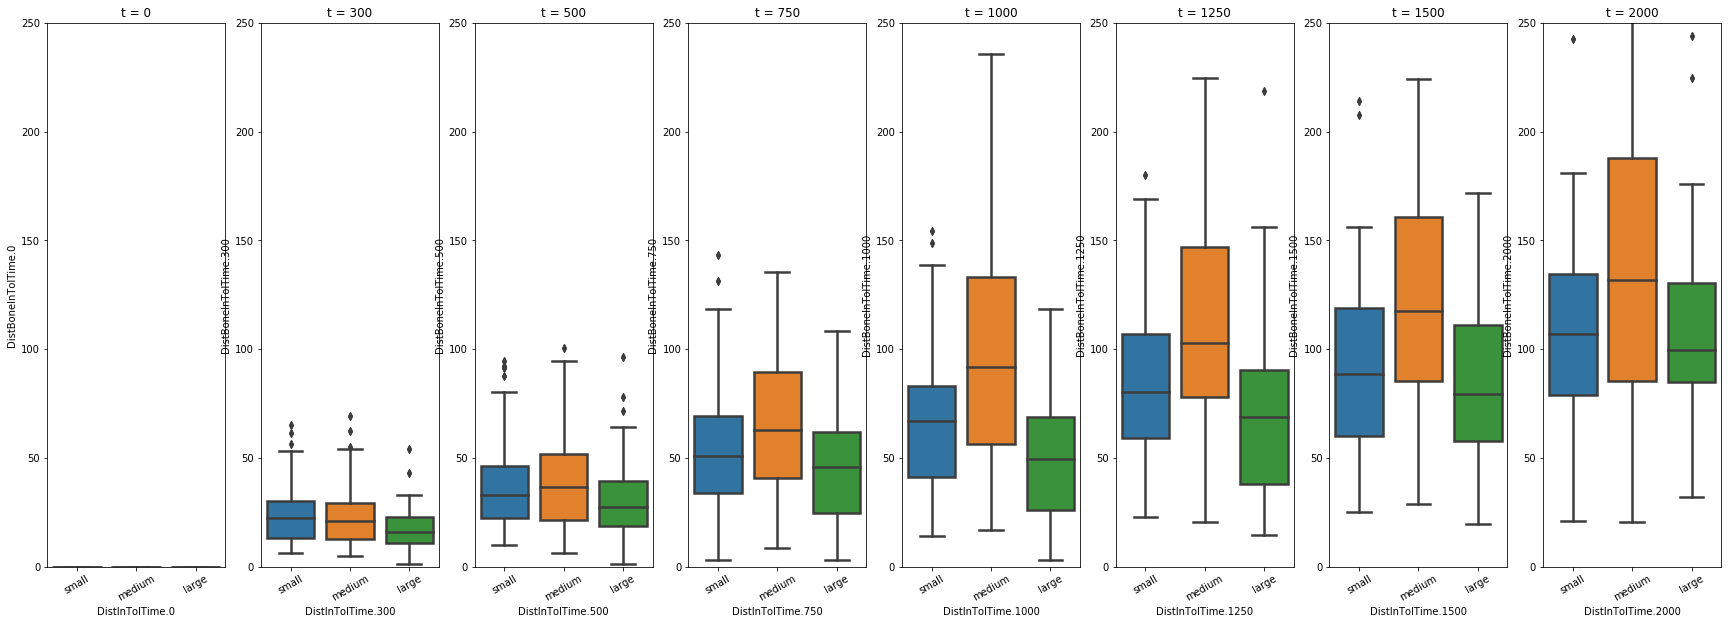

In [17]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    #nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

    
    

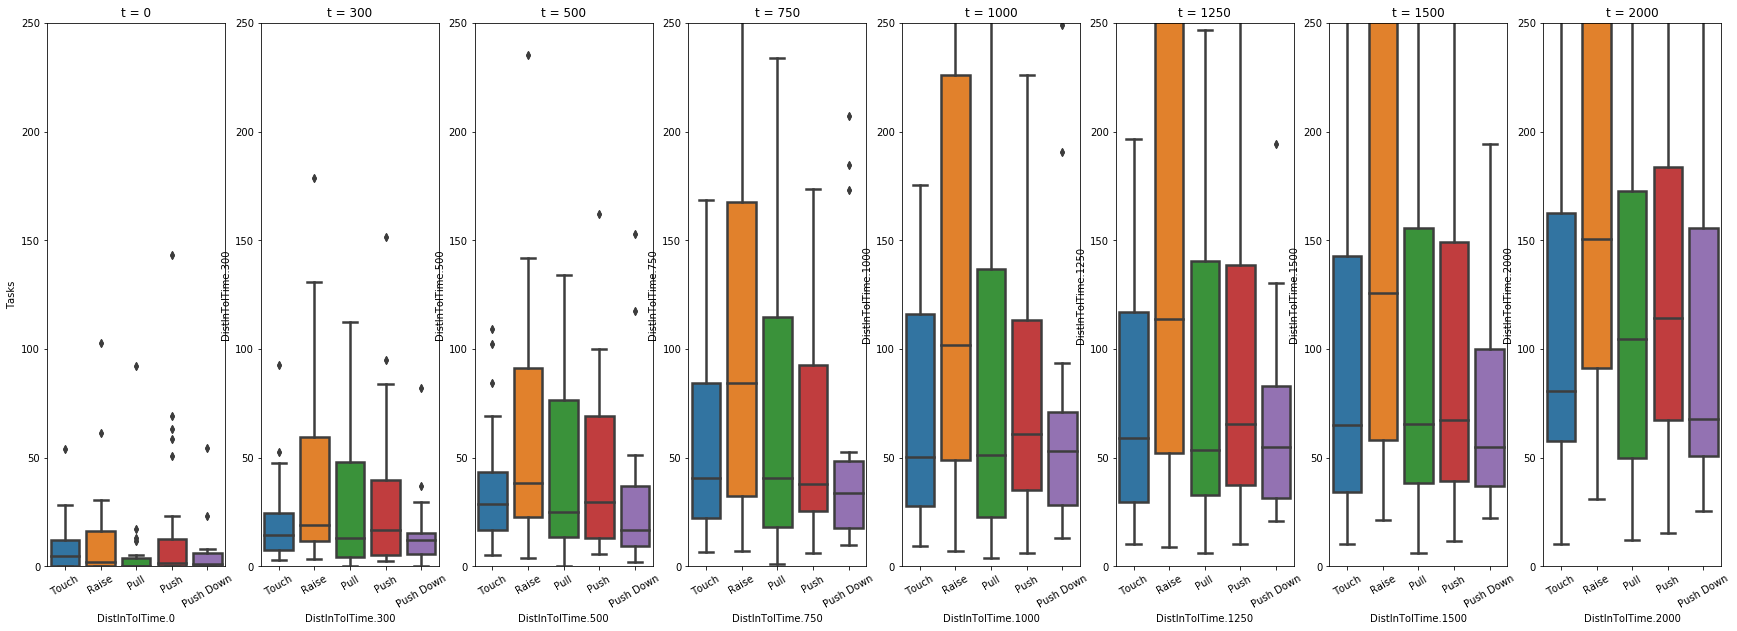

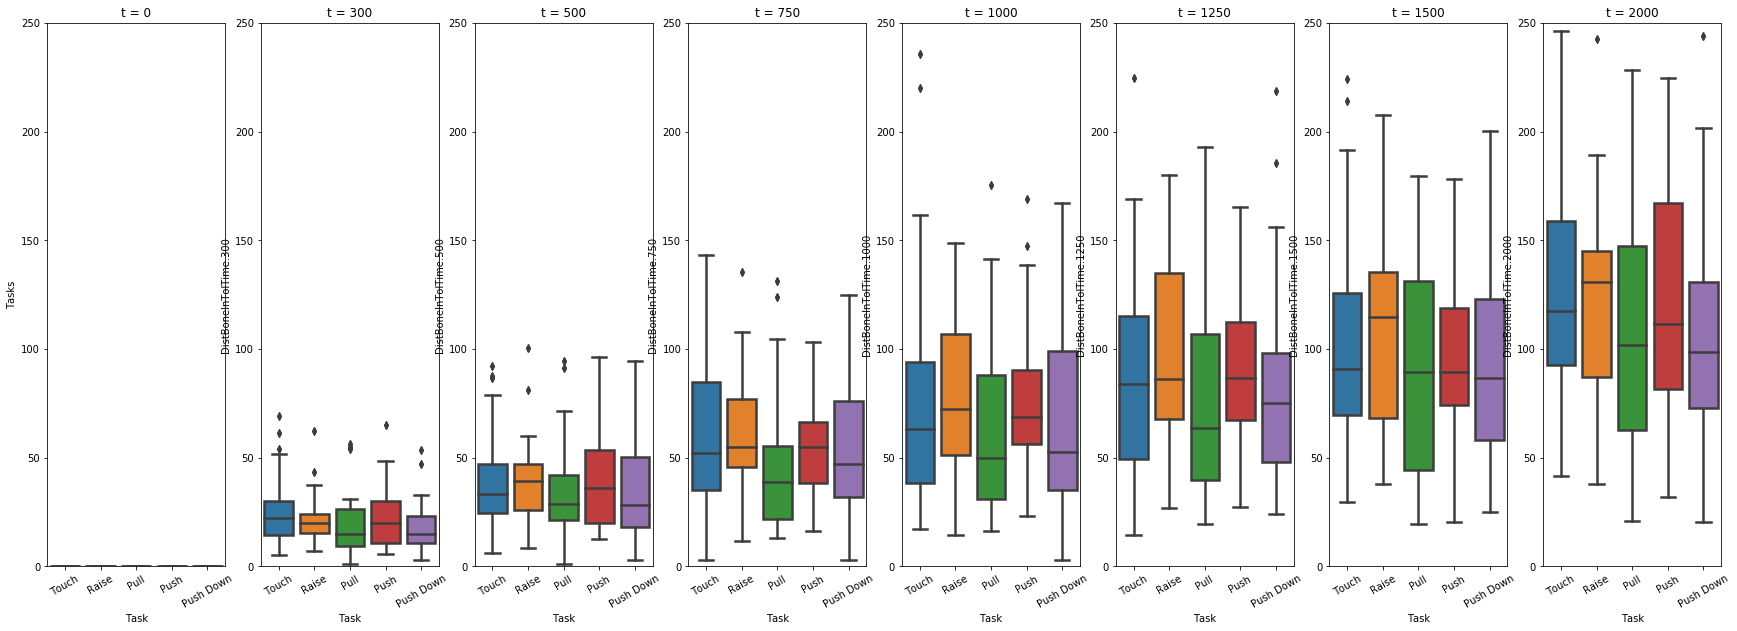

In [18]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [19]:
allConfig['Obj'].iloc[77], allConfig['Scale'].iloc[77], allConfig['Task'].iloc[77]

('obj6', 'medium', 'Pull')

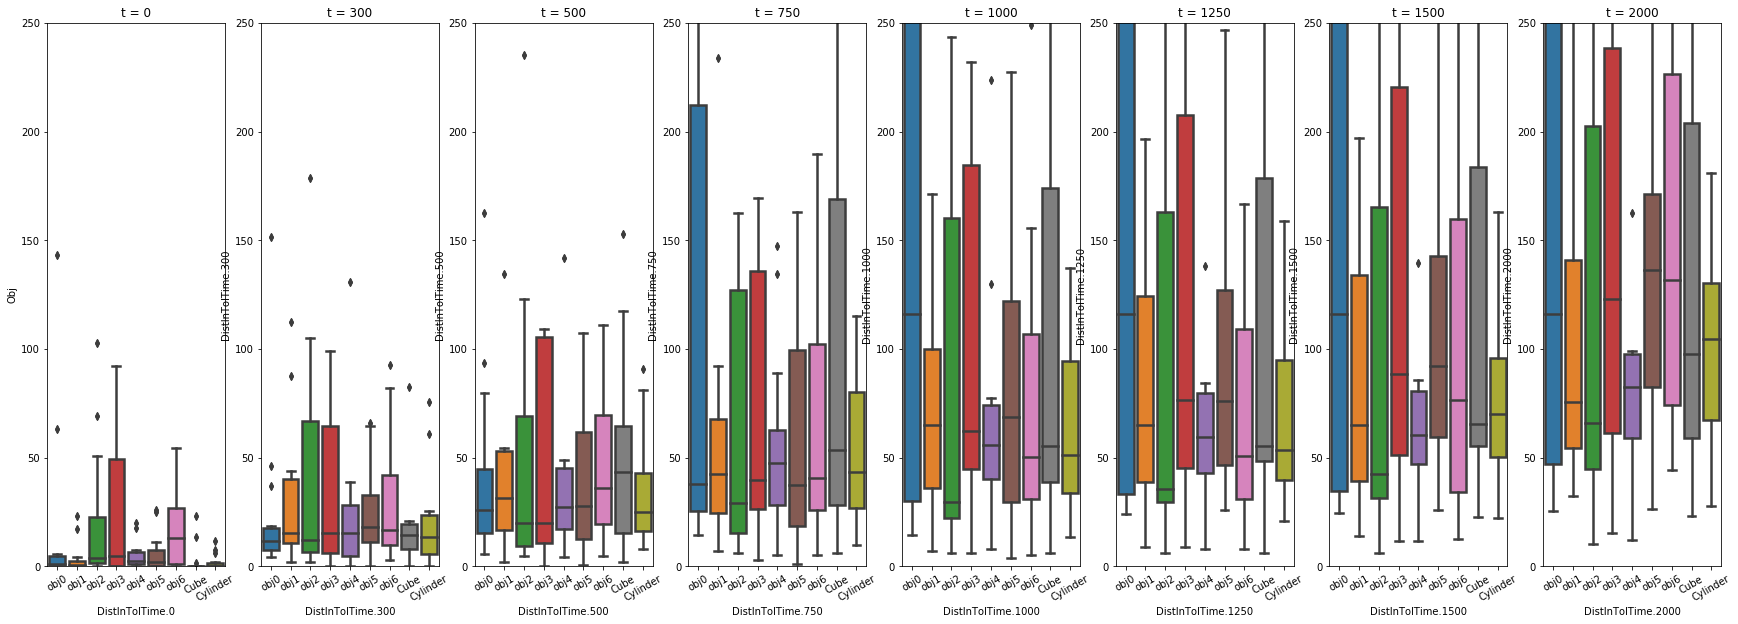

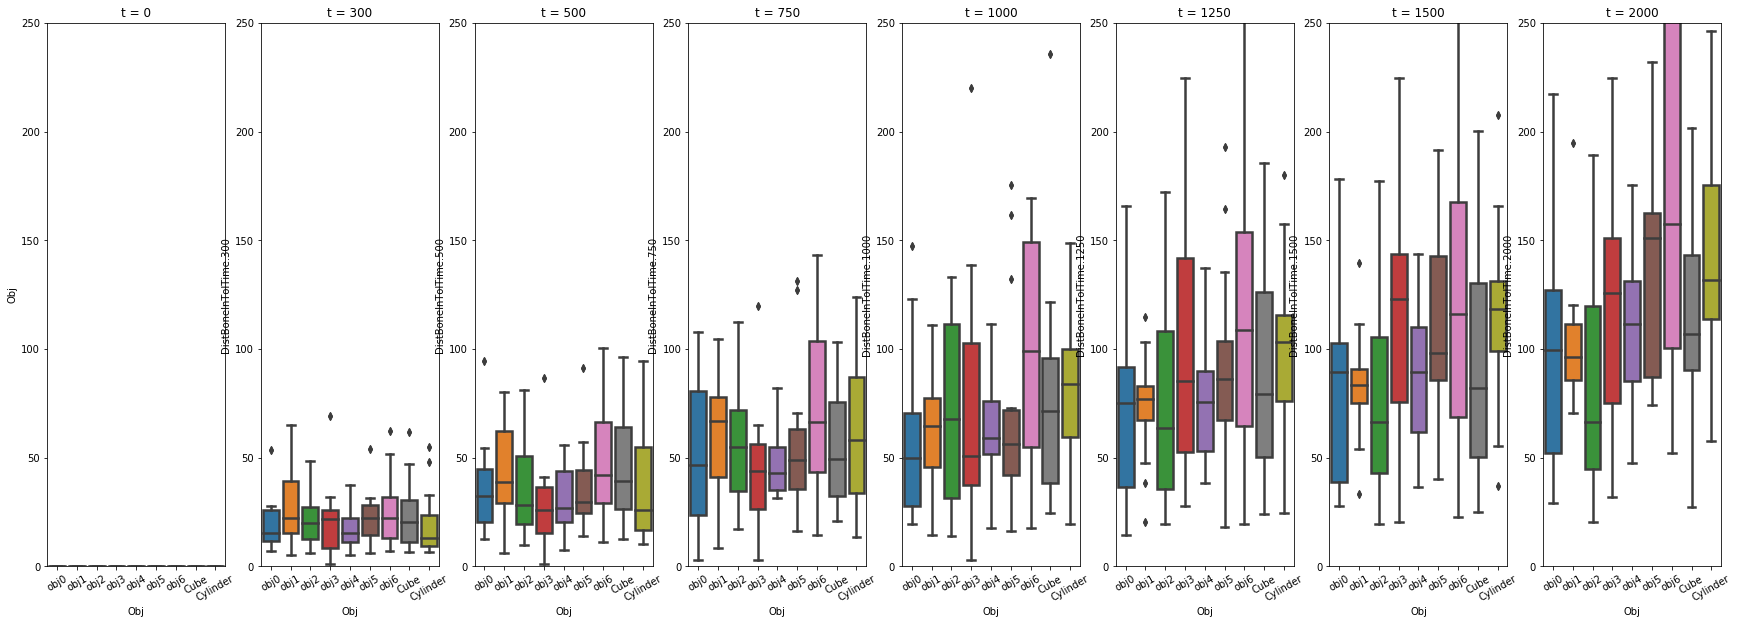

In [20]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [21]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers        

In [22]:
taskObj

Touch       Raise       Pull       Push   Push Down
obj0      11.586889    8.172405  11.937637  67.643698   19.035383
obj1       9.108430   19.112526  80.254564  27.919851    9.777630
obj2      16.206732   73.041743  39.529497  56.287004    6.518626
obj3      34.270469   32.854196  38.069656  34.277727  192.224077
obj4      10.973318   67.616552   5.096966  10.694986   22.036614
obj5      21.490056   32.119314  38.751207  15.667833   13.025851
obj6      39.151327   64.818012  12.684399  20.037367   11.417853
Cube      15.427645  107.454901  10.316356  11.122223   31.138454
Cylinder  23.476490   15.917671  25.682071  30.755262    3.210069

In [23]:
taskScale

Touch      Raise       Pull       Push  Push Down
small   21.365762  65.357129  27.550744  35.198656  20.148596
medium  20.165967  53.311473  51.689482  35.722537  13.824742
large   19.032057  21.700505   8.200558  20.547458  68.821514

In [24]:
scaleObj

obj0       obj1       obj2        obj3       obj4       obj5  \
small   37.609043  36.060348  25.565180   10.594390  36.899599  28.813255   
medium  24.363116  31.210613  77.135633   65.448337  13.588203  35.938441   
large    9.053448  20.432840  12.249348  122.974948  19.363259   7.880861   

             obj6       Cube   Cylinder  
small   38.881185  82.653865   8.240731  
medium  26.019097  16.334514  24.447606  
large   23.965092   6.287369  26.736600

# Scales and Tasks

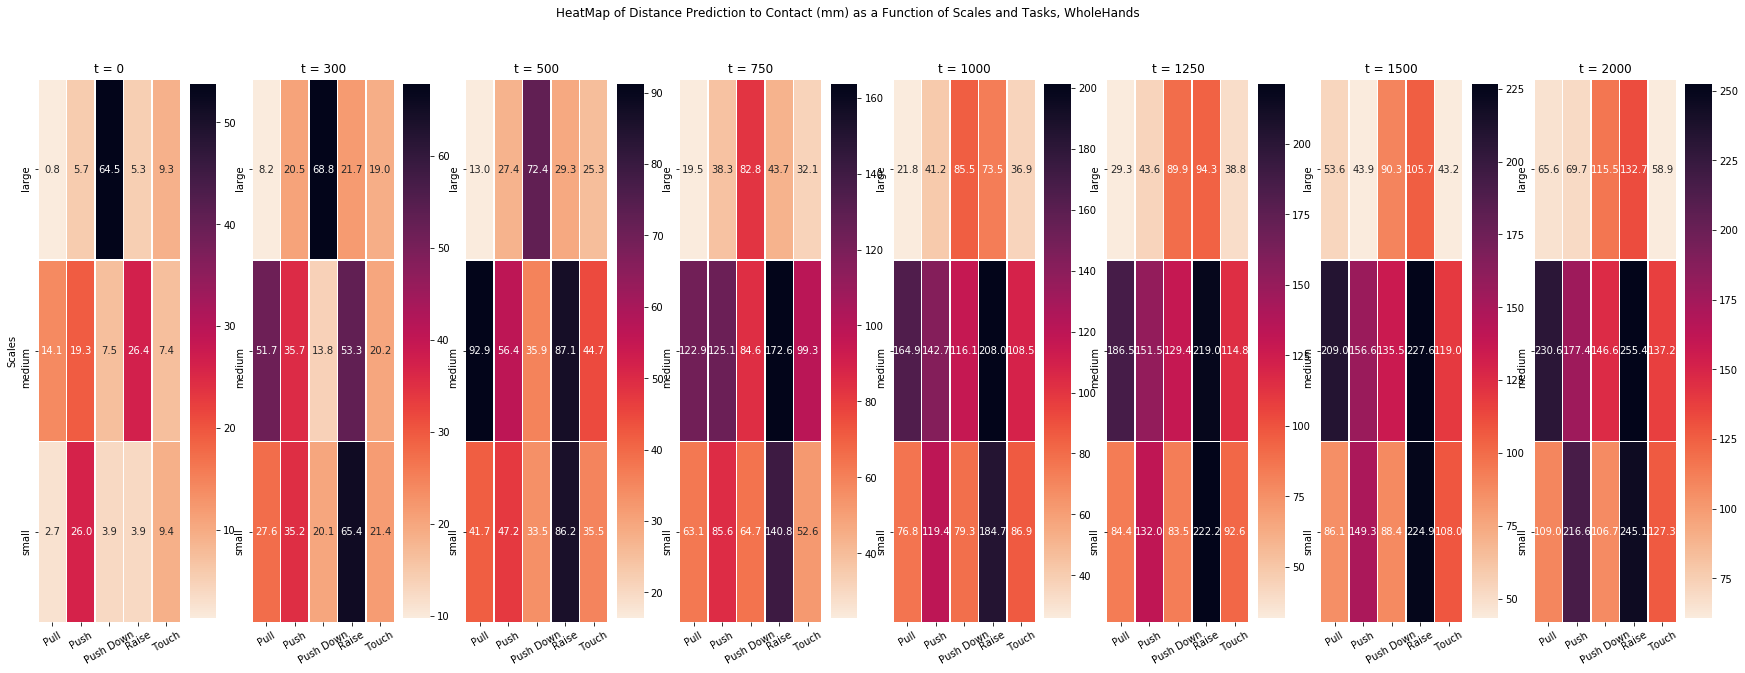

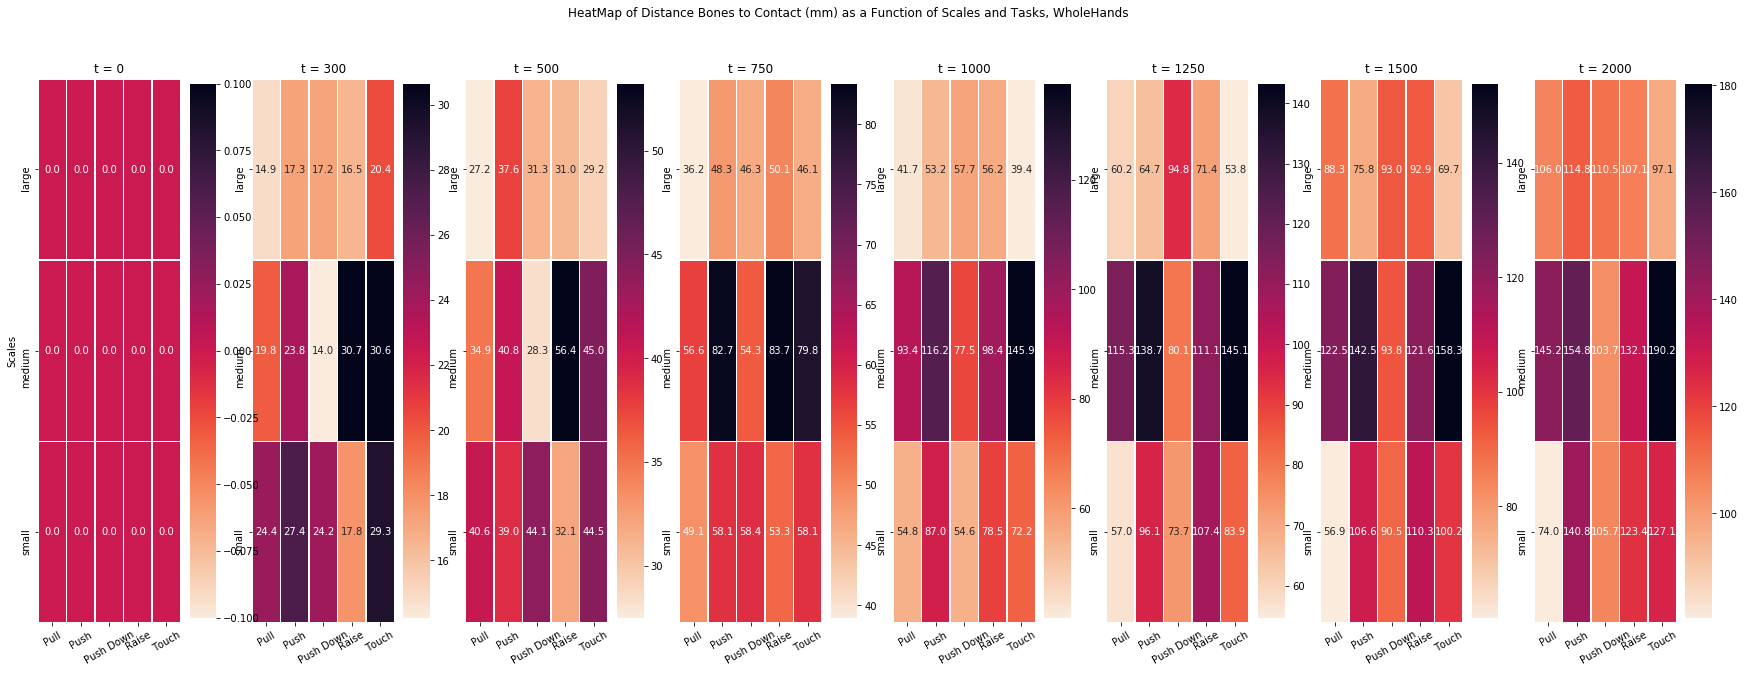

In [25]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, WholeHands')

plt.show()

In [26]:

tol = 300
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == 'obj6') & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)]
            

# Scales and Objects

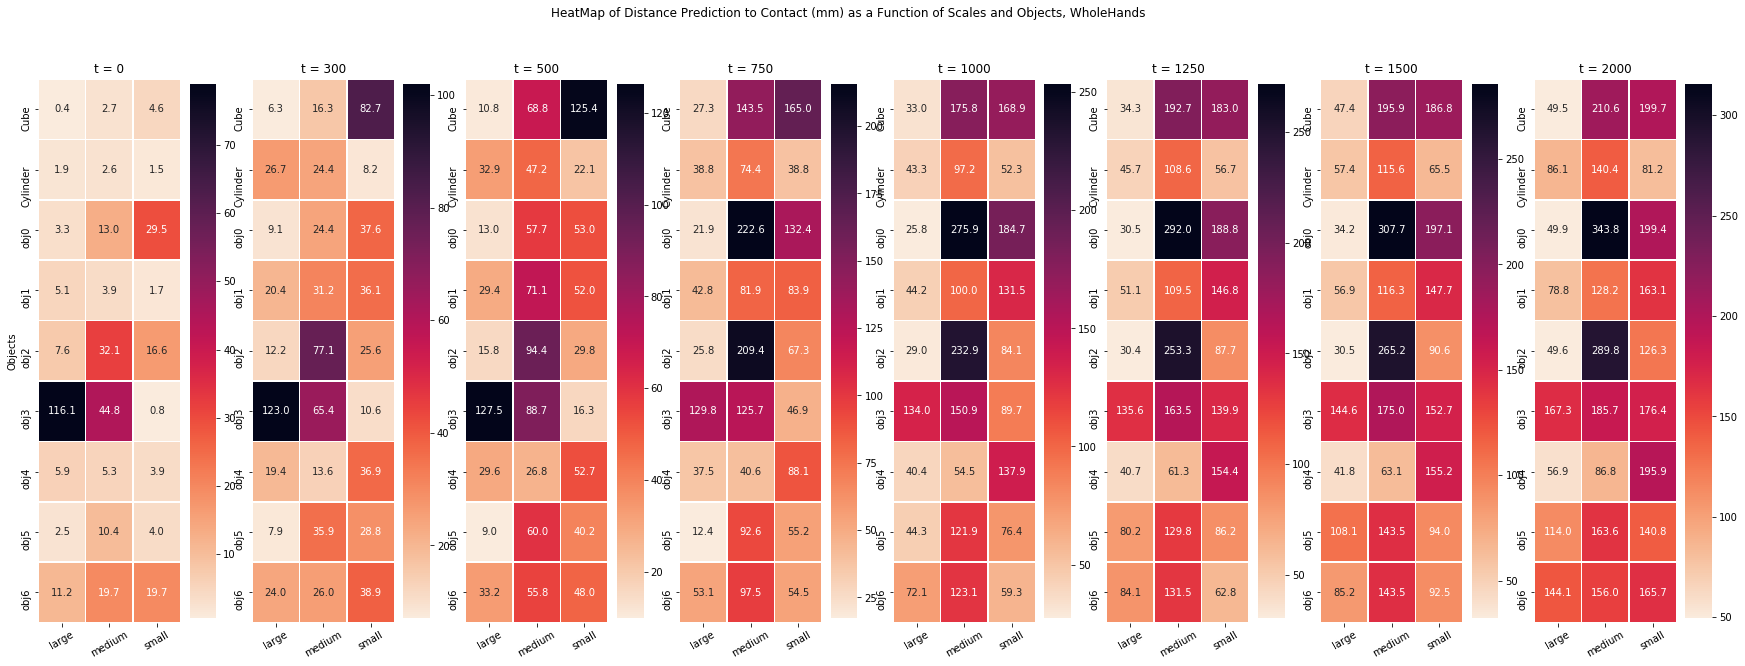

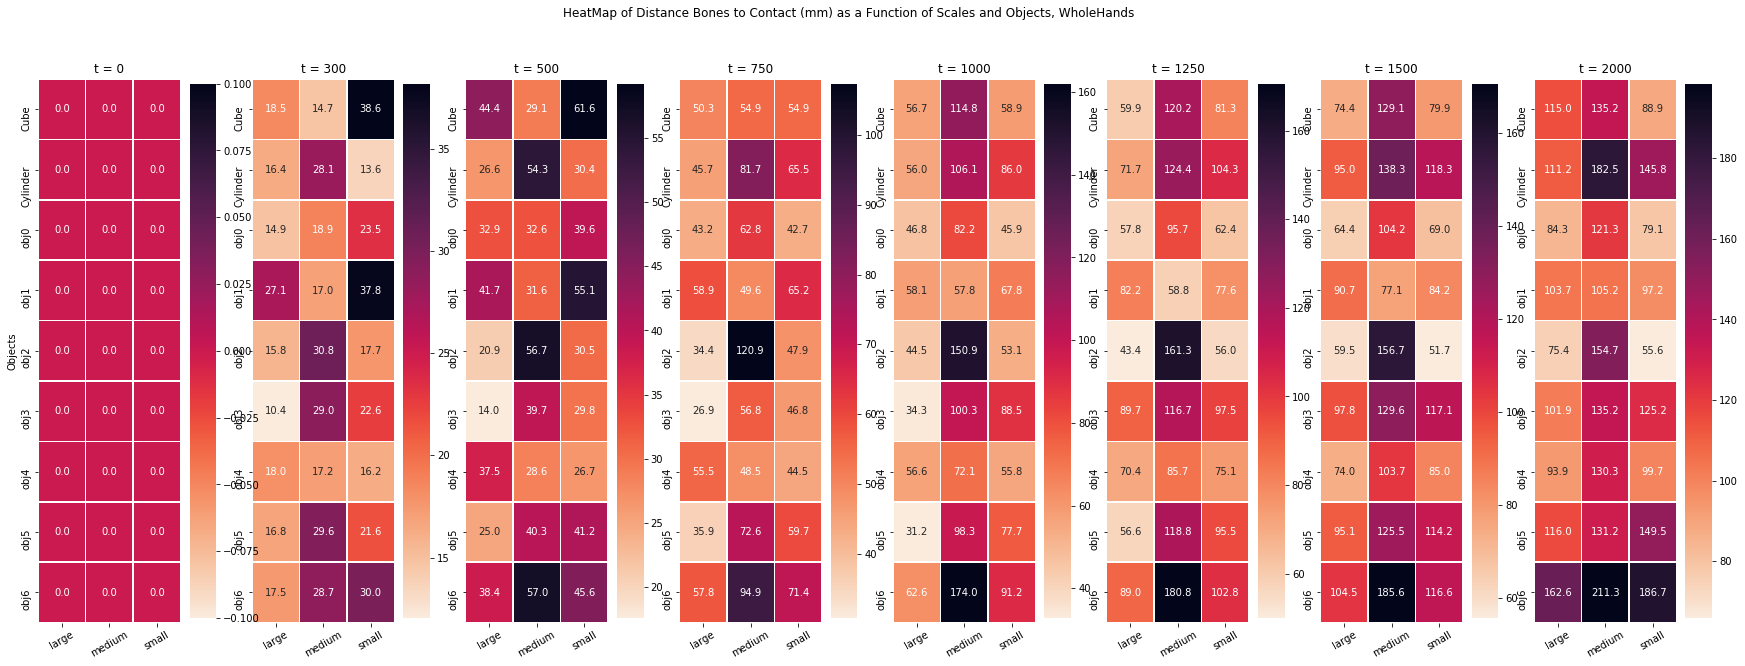

In [27]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers        
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Objects, WholeHands')

plt.show()

# Tasks and Objects

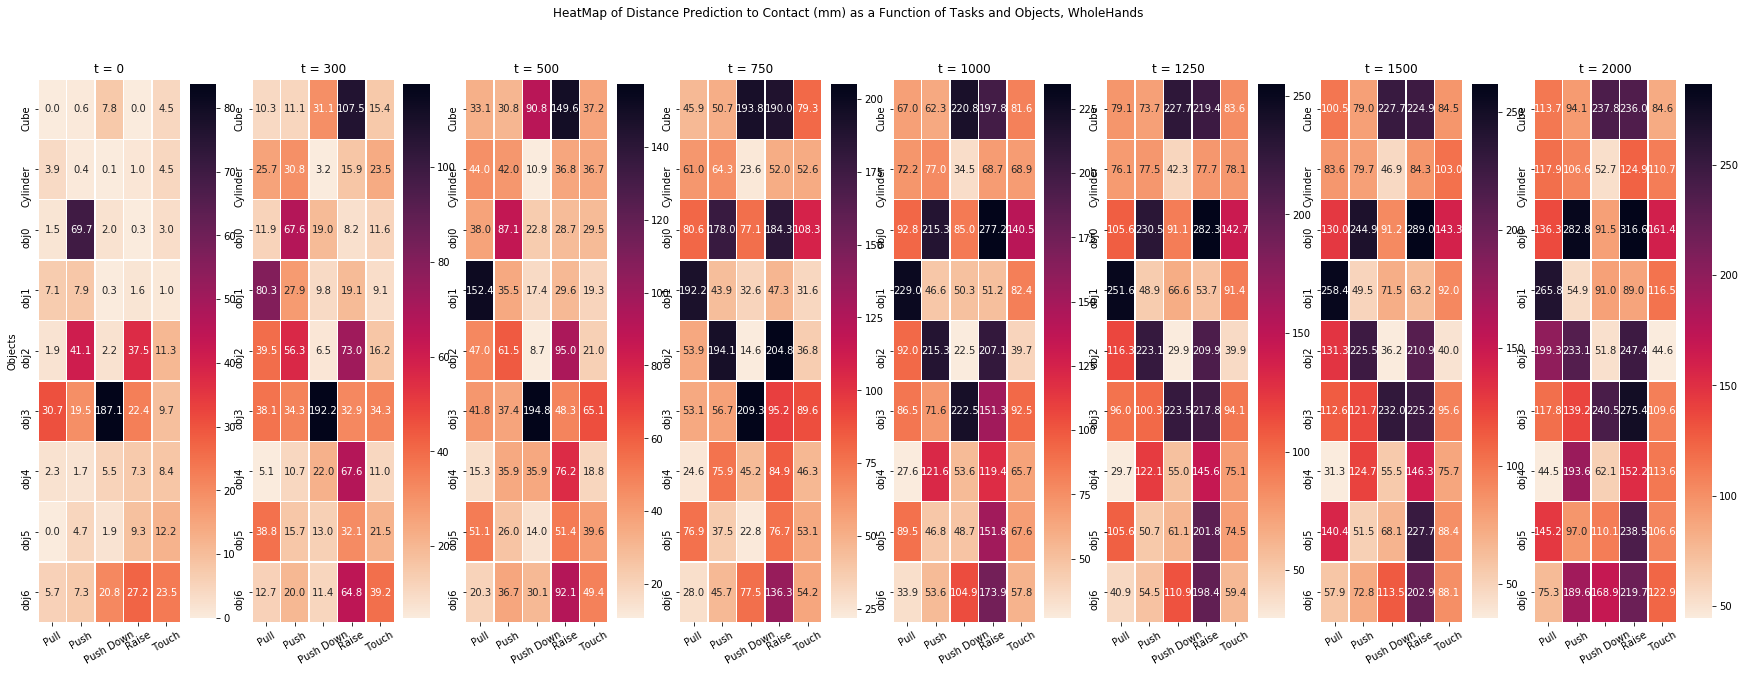

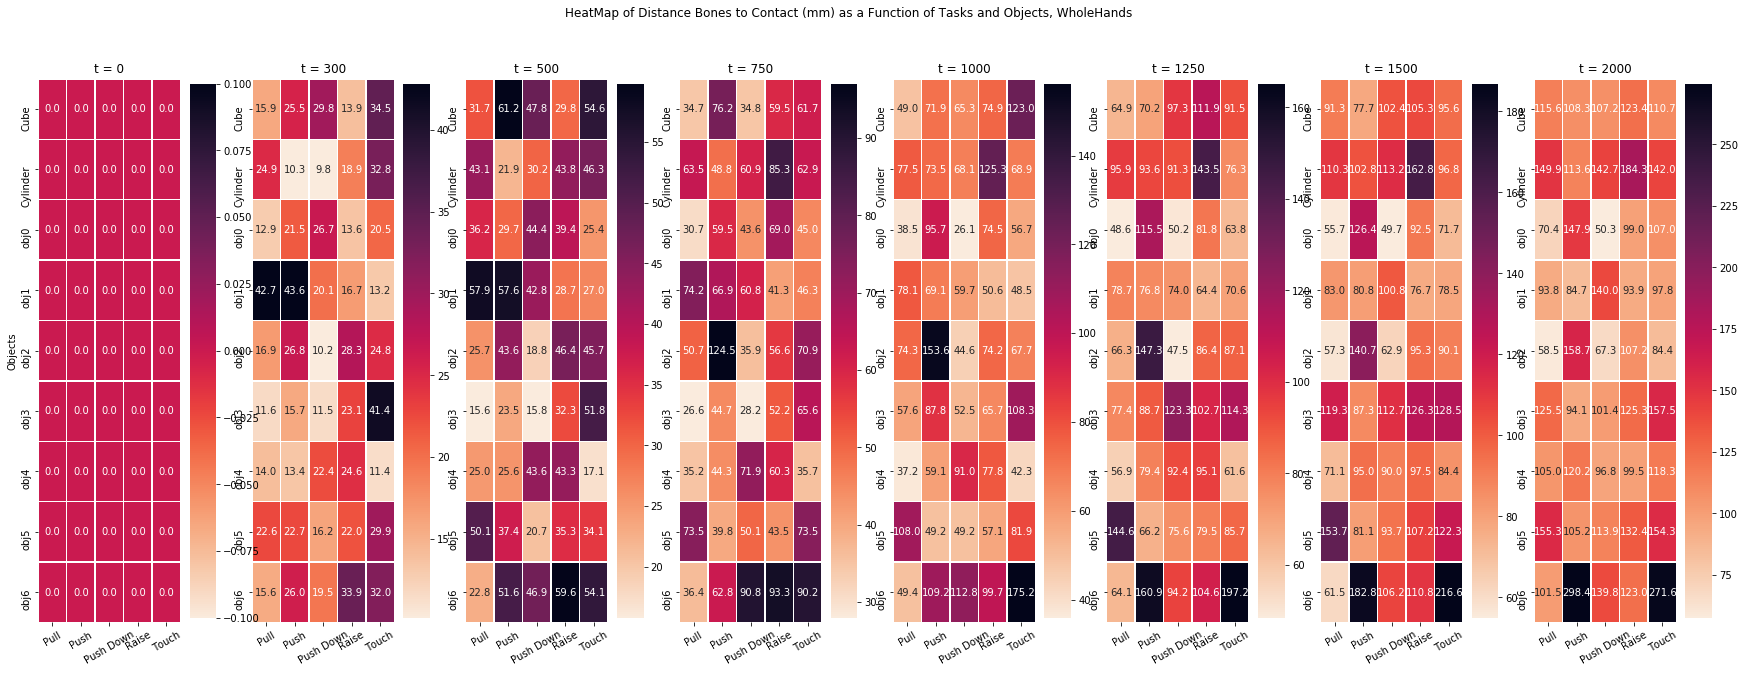

In [28]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Tasks and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Tasks and Objects, WholeHands')

plt.show()